In [67]:
import pandas as pd
import numpy as np


In [68]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
%ls
%cd drive/MyDrive


 arima_hyperband/                Isro_PPT.pptx                          rice.csv
 Attendance_System.v1i.yolov8/  'Isro Project.v2i.coco-segmentation'/   test.pkl
'Colab Notebooks'/              'Isro Project.v2i.png-mask-semantic'/
'Idea Sheet.gdoc'                MsAccountRecCode.pdf
[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [70]:
df = pd.read_csv('rice.csv')
df.head()


,Rice,Date
0,31.09,01-01-2022
1,31.00,02-01-2022
2,32.00,03-01-2022
3,31.13,04-01-2022
4,30.91,05-01-2022


In [71]:
df1 = df.drop(columns=['Date'])
print(df1.size)

730


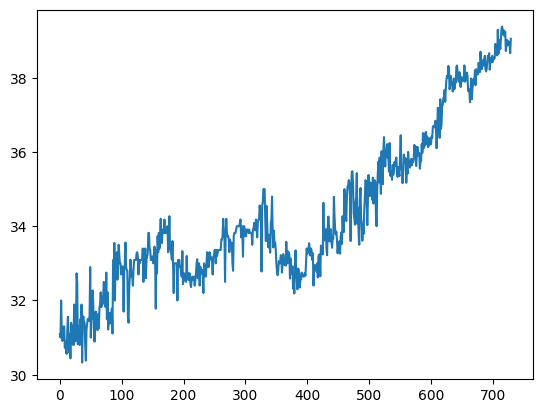

In [72]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [74]:
df1=df1.reshape(-1)
print(df1)

[0.0839779  0.07403315 0.18453039 0.08839779 0.0640884  0.07403315
 0.10718232 0.10718232 0.0441989  0.06187845 0.02983425 0.02541436
 0.09834254 0.1359116  0.06187845 0.02983425 0.08508287 0.0121547
 0.11823204 0.11049724 0.05414365 0.0839779  0.0519337  0.17237569
 0.0961326  0.06298343 0.0961326  0.26519337 0.23977901 0.05414365
 0.10718232 0.10718232 0.0519337  0.12928177 0.07403315 0.17237569
 0.         0.12928177 0.13701657 0.11823204 0.11823204 0.04972376
 0.00552486 0.09834254 0.11381215 0.12928177 0.12928177 0.12375691
 0.14033149 0.2839779  0.07403315 0.14475138 0.12928177 0.21436464
 0.17237569 0.0961326  0.06187845 0.0961326  0.15138122 0.11049724
 0.10718232 0.0961326  0.14475138 0.10165746 0.16243094 0.17348066
 0.20883978 0.16464088 0.19558011 0.17348066 0.19668508 0.23977901
 0.19668508 0.17348066 0.16464088 0.26740331 0.12928177 0.20883978
 0.09834254 0.12928177 0.1480663  0.1160221  0.12928177 0.14033149
 0.16022099 0.08618785 0.30497238 0.23425414 0.3558011  0.18453

In [75]:
import numpy as np

def create_dataset(dataset, time_step=1):
    datax, datay = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step)]
        datax.append(a)
        datay.append(dataset[i + time_step])
    return np.array(datax), np.array(datay)


In [160]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step =120
X, y = create_dataset(df1, time_step)


In [161]:
print(y.shape)

(610,)


In [162]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)



In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [164]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [165]:
#use wheat_model here
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [166]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 120, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - loss: 0.2040 - val_loss: 0.0300
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 0.0163 - val_loss: 0.0133
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0101 - val_loss: 0.0103
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4

In [168]:
test_predict=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


In [169]:
test_predict = scaler.inverse_transform(test_predict)
y_out = scaler.inverse_transform(y_test.reshape(-1, 1))

In [170]:
### Calculate RMSE performance metrics
print(y_out)

[[32.73]
 [33.77]
 [33.3 ]
 [39.13]
 [32.3 ]
 [33.64]
 [36.38]]


In [171]:
print(test_predict)

[[32.909084]
 [34.209232]
 [33.822956]
 [39.00776 ]
 [32.74013 ]
 [33.644463]
 [36.17395 ]]


In [172]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_out,test_predict))

0.3272426374863134

In [174]:
import pickle
pickle_out = open("rice.pkl" , "wb")
pickle.dump(model , pickle_out)
pickle_out.close()